In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score

In [30]:
data=pd.read_csv('dataset.csv')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [31]:
data.count()

index                          11055
having_IPhaving_IP_Address     11055
URLURL_Length                  11055
Shortining_Service             11055
having_At_Symbol               11055
double_slash_redirecting       11055
Prefix_Suffix                  11055
having_Sub_Domain              11055
SSLfinal_State                 11055
Domain_registeration_length    11055
Favicon                        11055
port                           11055
HTTPS_token                    11055
Request_URL                    11055
URL_of_Anchor                  11055
Links_in_tags                  11055
SFH                            11055
Submitting_to_email            11055
Abnormal_URL                   11055
Redirect                       11055
on_mouseover                   11055
RightClick                     11055
popUpWidnow                    11055
Iframe                         11055
age_of_domain                  11055
DNSRecord                      11055
web_traffic                    11055
P

In [32]:
data.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
index                          11055 non-null int64
having_IPhaving_IP_Address     11055 non-null int64
URLURL_Length                  11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitt

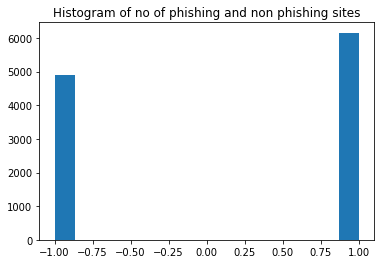

In [34]:
plt.hist(data['Result'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of no of phishing and non phishing sites")
plt.show()

In [35]:
#importing the dataset
data=pd.read_csv('dataset.csv')
data=data.drop(columns=['index'])
data_copy=data.copy()
Y=data_copy['Result']
X=data_copy.drop(columns=['Result'])
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
rfc=RandomForestClassifier(n_estimators=10,criterion="entropy",max_features=5,random_state=42)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         -1       0.97      0.95      0.96      1565
          1       0.96      0.98      0.97      2084

avg / total       0.97      0.97      0.97      3649



In [36]:
model=SVC(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         -1       0.94      0.92      0.93      1565
          1       0.94      0.95      0.95      2084

avg / total       0.94      0.94      0.94      3649



In [37]:
#importing the dataset
model=DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.score(X_test,y_test))

0.8516004337800166


In [64]:
pca=PCA(n_components=6)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
rfc_pca=RandomForestClassifier(criterion="entropy",random_state=42)
rfc_pca.fit(X_train_pca,y_train)
y_pred=rfc_pca.predict(X_test_pca)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         -1       0.87      0.87      0.87       981
          1       0.89      0.90      0.89      1230

avg / total       0.88      0.88      0.88      2211



In [39]:
model_pca=SVC(random_state=42)
model_pca.fit(X_train_pca,y_train)
y_pred=model_pca.predict(X_test_pca)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         -1       0.90      0.90      0.90      1565
          1       0.93      0.92      0.93      2084

avg / total       0.91      0.91      0.91      3649



In [40]:
model_pca=DecisionTreeRegressor(random_state=42)
model_pca.fit(X_train_pca,y_train)
y_pred=model_pca.predict(X_test_pca)
print(model_pca.score(X_test_pca,y_test))

0.7213054613530652


In [41]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(X_train)
X_train_pca_2=pca.transform(X_train)
X_test_pca_2=pca.transform(X_test)
rfc_pca_2=RandomForestClassifier(criterion="entropy",random_state=42)
rfc_pca_2.fit(X_train_pca_2,y_train)
y_pred=rfc_pca_2.predict(X_test_pca_2)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         -1       0.89      0.90      0.90      1565
          1       0.93      0.92      0.92      2084

avg / total       0.91      0.91      0.91      3649



In [42]:
model_pca_2=SVC(random_state=42)
model_pca_2.fit(X_train_pca_2,y_train)
y_pred=model_pca_2.predict(X_test_pca_2)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         -1       0.79      0.82      0.81      1565
          1       0.86      0.83      0.85      2084

avg / total       0.83      0.83      0.83      3649



In [49]:
model_pca_2=DecisionTreeRegressor(random_state=42)
model_pca_2.fit(X_train_pca_2,y_train)
y_pred=model_pca_2.predict(X_test_pca_2)
print(model_pca_2.score(X_test_pca_2,y_test))

0.6227772887945057


In [83]:
rkf = KFold(n_splits=8)
c=0
d=0
for train_index, test_index in rkf.split(X):
    #print("Train:", train_index, "Validation:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    rfc_kfold=RandomForestClassifier(n_estimators=10,criterion="entropy",max_features=5,random_state=42)
    rfc_kfold.fit(X_train,y_train)
    y_pred=rfc_kfold.predict(X_test)
    c=c+1
    f=rfc_kfold.score(X_test,y_test)*100
    d=d+f
d=d/c
print("The average accuracy is: "+str(d))

The average accuracy is: 97.25898748887894


In [79]:
rkf = KFold(n_splits=5)
c=0
d=0
for train_index, test_index in rkf.split(X):
    #print("Train:", train_index, "Validation:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    svc_kfold=SVC(random_state=40)
    svc_kfold.fit(X_train,y_train)
    y_pred=svc_kfold.predict(X_test)
    c=c+1
    f=svc_kfold.score(X_test,y_test)*100
    d=d+f
d=d/c
print("The average accuracy is: "+str(d))

The average accuracy is: 94.12030755314336


In [73]:
rkf = KFold(n_splits=6)
c=0
d=0
for train_index, test_index in rkf.split(X):
    #print("Train:", train_index, "Validation:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    desc_kfold=DecisionTreeRegressor(random_state=40)
    desc_kfold.fit(X_train,y_train)
    y_pred=desc_kfold.predict(X_test)
    c=c+1
    f=desc_kfold.score(X_test,y_test)*100
    d=d+f
d=d/c
print("The average accuracy is: "+str(d))

The average accuracy is: 85.70115346551842
